In [522]:
import tensorflow as tf
import mtcnn
from mtcnn import MTCNN
import PIL
from PIL import Image , ImageDraw, ImageFont
import numpy as np
import pandas as pd
from IPython.display import display
import cv2

In [523]:
imagepath = ('../data/test/Aditya.jpg')

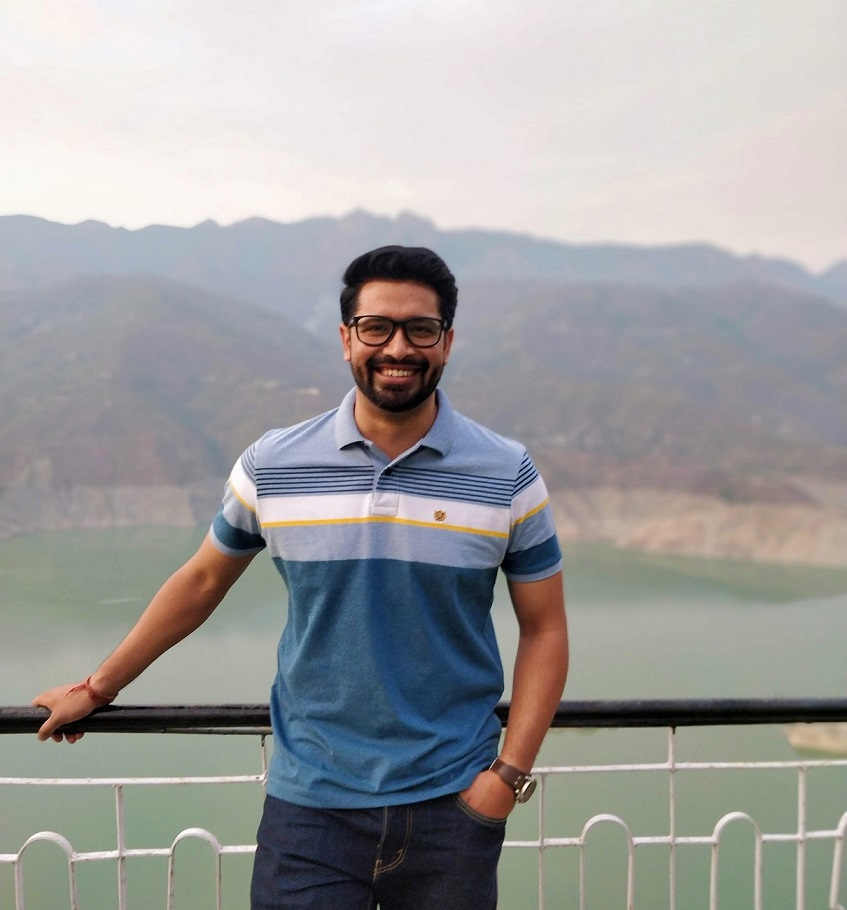

In [524]:
image = Image.open(imagepath)
image

In [525]:
image = image.convert('RGB')
pixels = np.asarray(image)

In [526]:
pixels.shape

(910, 847, 3)

In [527]:
detector= MTCNN()

In [528]:
result = detector.detect_faces(pixels) 

In [529]:
result

[{'box': [349, 282, 92, 121],
  'confidence': 0.9999997615814209,
  'keypoints': {'left_eye': (376, 330),
   'right_eye': (419, 330),
   'nose': (398, 356),
   'mouth_left': (373, 371),
   'mouth_right': (421, 370)}}]

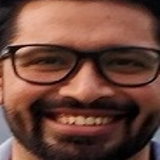

In [530]:
l = []
x1, y1, x2, y2 = 0, 0 ,0, 0
for i in range(len(result)):
    x1, y1, width, height = result[i]['box']
    x1, y1 = abs(x1) , abs(y1)
    x2, y2 = abs(x1) + width , abs(y1) + height 
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize((160,160))
    face_array = np.asarray(image)
    display(image)

In [531]:
x1 -= 10
y1 -= 10
x2 += 10
y2 += 10

In [532]:
image = cv2.imread(imagepath) 
start_point = (x1, y2) 
# Ending coordinate, here (220, 220) 
# represents the bottom right corner of rectangle 
end_point = (x2, y1) 
  
# Blue color in BGR 
color = (0,255, 255) 
  
# Line thickness of 2 px 
thickness = 2
  
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(image, start_point, end_point, color, thickness) 
  
# Displaying the image  
cv2.imwrite('Highlighted.jpg', image)  

True

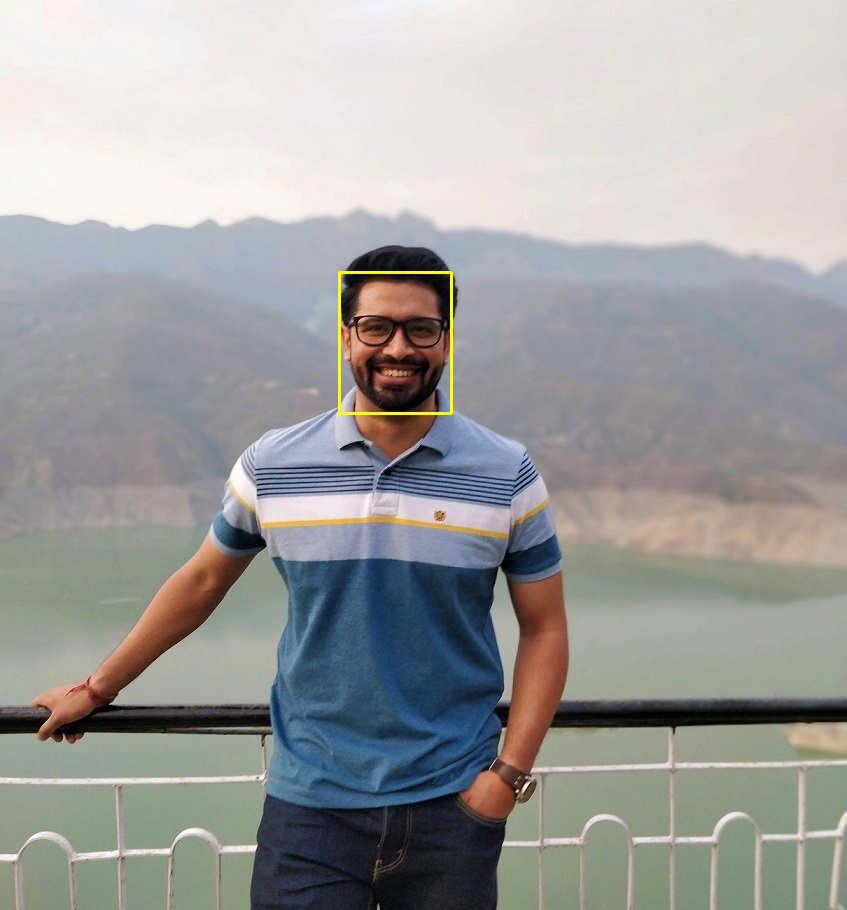

In [533]:
image = Image.open('Highlighted.jpg')
image

In [300]:
x1_text = x1 + 10 
y2_text = y2

In [ ]:
fnt = ImageFont.truetype('Arial.ttf', 15)
d = ImageDraw.Draw(image)
d.text((x1_text,y2_text), "SID", font=fnt, fill=(255, 0,0 ))
image